#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  4 10:23:50 2018
Modified Oct 2020, Oct 2021, Oct 2023

@author: Said Ladjal,Isabelle Bloch
"""

In [18]:
#%% SECTION 1 -- inclusion of packages


import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndip
from skimage import io as skio


import skimage.morphology as morpho 
from skimage.segmentation import watershed 
from skimage.draw import line
import skimage.feature as skf
from scipy import ndimage as ndi

In [19]:
#%% SECTION 2 -- Useful functions

def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat

        Questa funzione mostra l'immagine IN SCALA DI GRIGI in GIMP. Se GIMP 
        è già aperto, verrà utilizzato. Per impostazione predefinita, normalize=True.
        In questo caso, l'immagine viene normalizzata tra 0 e 255 prima di essere salvata. Se normalize=False, i valori MIN e MAX saranno impostati su 0 e 255 nell'immagine risultante.
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        

        Questa funzione mostra l'immagine IN SCALA DI GRIGI in GIMP. 
        Se GIMP è già aperto, verrà utilizzato. Per impostazione predefinita, 
        normalise=True. In questo caso, l'immagine viene normalizzata tra 0 
        e 255 prima di essere salvata. Se normalise=False, i valori MINI 
        (impostati per default a 0) e MAXI (impostati per default a 255) 
        saranno impostati a 0 e 255 nell'immagine risultante.
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme  
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)

      Restituisce un elemento strutturante di forma:

'diamond': una sfera chiusa di norma 1 con un raggio di dimensione
'disk': una sfera chiusa di norma 2 con un raggio di dimensione
'square': un quadrato di lato di dimensione (è meglio usare dimensione dispari)
'line': un segmento di lunghezza dimensione e orientamento angolo 
        (compreso tra 0 e 180 gradi)
    """

    if forme == 'diamond':
        return morpho.diamond(taille)
    if forme == 'disk':
        return morpho.disk(taille)
    if forme == 'square':
        return morpho.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

            

def couleurs_alea(im):
    """ 
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.

    Assegna colori casuali a un'immagine in scala di grigi. Questa funzione 
    è utile quando il livello di grigio è interpretato come un numero di regione 
    o per visualizzare leggeri sfumature di una tonalità di grigio.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3

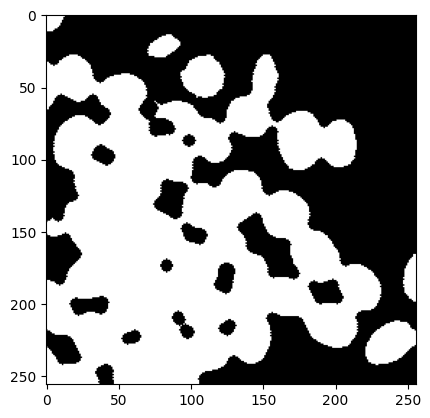

In [20]:
#%% SECTION 3 -- Examples of functions for this work

# Binary images 
#im1=skio.imread('images/cellbin.bmp')
im=skio.imread('images/cafe.bmp')*255


# Gray-scale images
#im=skio.imread('images/retina2.gif')
#im=skio.imread('bat200.bmp')
#im=skio.imread('bulles.bmp')
#im=gris_depuis_couleur (skio.imread('cailloux.png'))
#im=gris_depuis_couleur(skio.imread('cailloux2.png'))
#im=skio.imread('laiton.bmp')
#print(im.max())

plt.imshow(im,cmap="gray",vmin=0, vmax=255)

# viewimage(im) - Utilisable à la place de plt.imshow si Gimp est installé.

se=strel('disk',4)

# dilation
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray",vmin=0, vmax=255)
plt.savefig('grafico.png')#mia aggiunta

# erosion
ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray",vmin=0, vmax=255)

#opening
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray",vmin=0, vmax=255)

#closing
close=morpho.closing(im,se)
plt.imshow(close,cmap="gray",vmin=0, vmax=255)

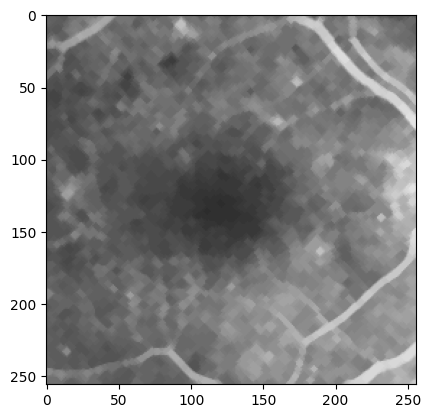

In [21]:
#%% Top-hat transforme
im=skio.imread('images/retina2.gif')
t=10
se=strel('line',t,-45)
ch=im-morpho.opening(im,se)
plt.imshow(ch,cmap="gray",vmin=0, vmax=255)

#%%  Alternate sequential filter
im=skio.imread('images/retina2.gif')
imt=im.copy()
N=3
for k in range(N):
    se=strel('disk',k)
    imt=morpho.closing(morpho.opening(imt,se),se)
plt.imshow(imt,cmap="gray",vmin=0, vmax=255)

In [23]:
#%% Watersheds
im=skio.imread('images/bat200.bmp')
se=morpho.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0: 
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray") 

IndexError: tuple index out of range

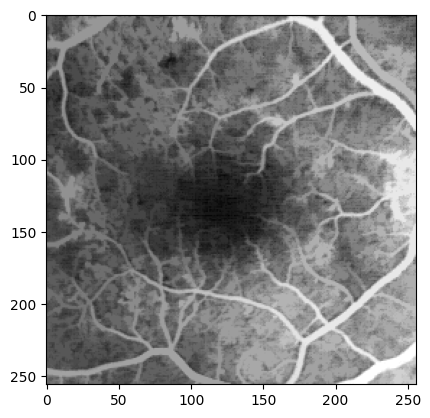

In [25]:
#%% reconstruction
im=skio.imread('images/retina2.gif')
se4=strel('disk',4)
open4=morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")


TP1 MORPHO

Mathematical morfology on gray-scale images

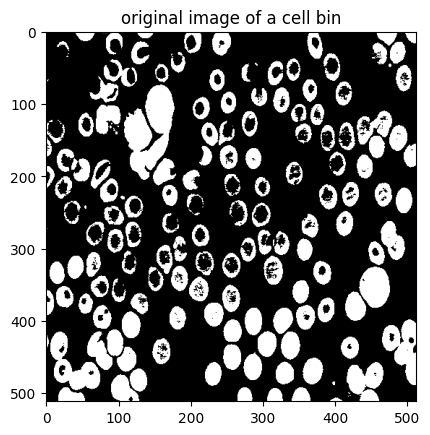

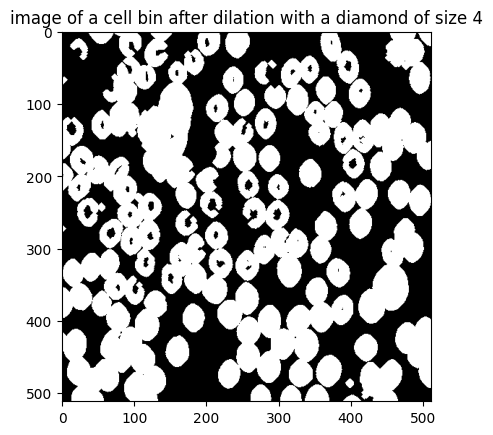

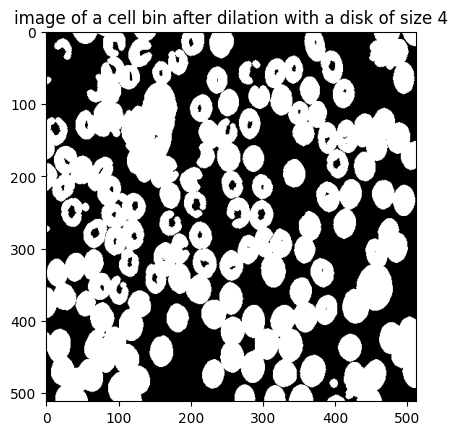

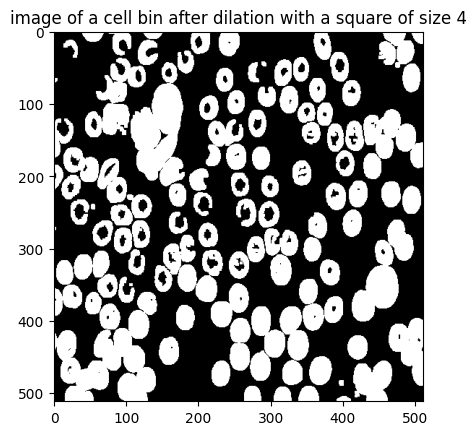

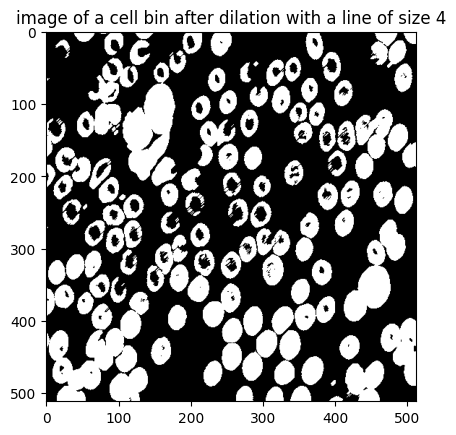

In [39]:
#1.1
plt.title("original image of a cell bin")
plt.imshow(im_cell_bin,cmap="gray",vmin=0, vmax=255)
plt.show()
#dilation with different structuring elements in terms of size and shape
for se_str in ["diamond", "disk", "square", "line"]:
    size=4
    se=strel(se_str,size)
    im_cell_bin=skio.imread('images/cellbin.bmp')*255
    dil=morpho.dilation(im_cell_bin,se)
    plt.title(f"image of a cell bin after dilation with a {se_str} of size {size}")
    plt.imshow(dil,cmap="gray",vmin=0, vmax=255)
    plt.show()

In [ ]:
#prova
def morphological_op(structuring_elements):
    for se_shape, se_size in structuring_elements:
        se = strel(se_shape, se_size)

        # Dilation
        dilated = morpho.dilation(im_cell_bin, se)
        plt.figure(figsize=(8, 8))
        plt.subplot(2, 2, 1)
        plt.title(f"Dilated with {se_shape} SE of size {se_size}")
        plt.imshow(dilated, cmap="gray")

        # Erosion
        eroded = morpho.erosion(im_cell_bin, se)
        plt.subplot(2, 2, 2)
        plt.title(f"Eroded with {se_shape} SE of size {se_size}")
        plt.imshow(eroded, cmap="gray")

        # Opening
        opened = morpho.opening(im_cell_bin, se)
        plt.subplot(2, 2, 3)
        plt.title(f"Opened with {se_shape} SE of size {se_size}")
        plt.imshow(opened, cmap="gray")

        # Closing
        closed = morpho.closing(im_cell_bin, se)
        plt.subplot(2, 2, 4)
        plt.title(f"Closed with {se_shape} SE of size {se_size}")
        plt.imshow(closed, cmap="gray")

        plt.show()

In [41]:
#requires to be set only one parameter between the shape and the size of the structuring element
def morphological_op1(op, se_shape, se_size):
    if(len(se_shape)>0 and se_size>0):
        print("Not applicable! Requirements not met.")
    else:
        plot_pos=1
        #different sizes
        if len(se_shape)>0:
            l=[(1,se_shape), (2,se_shape), (3,se_shape), (4,se_shape)]
        #different shapes
        elif (se_size!=-1):
            l=[(se_size,"diamond"), (se_size,"disk"), (se_size,"square"), (se_size,"line")]

        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
        for sz, sh in l:
            if(op=="dilation"):
                morpho_op=morpho.dilation(im_cell_bin, strel(sh, sz))
            if(op=="erosion"):
                morpho_op=morpho.erosion(im_cell_bin, strel(sh, sz))
            if(op=="opening"):
                morpho_op=morpho.opening(im_cell_bin, strel(sh, sz))
            if(op=="closing"):
                morpho_op=morpho.closing(im_cell_bin, strel(sh, sz))
            #plt.figure(figsize=(8, 8))
            plt.subplot(2, 2, plot_pos)
            plt.title(f"{op} with {sh} SE of size {sz}")
            plt.imshow(morpho_op, cmap="gray")
            plot_pos+=1


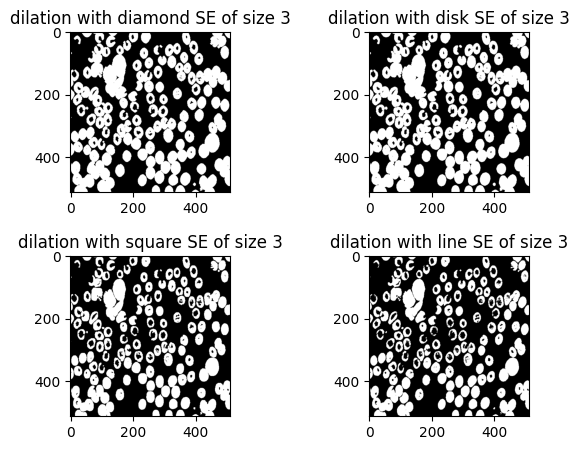

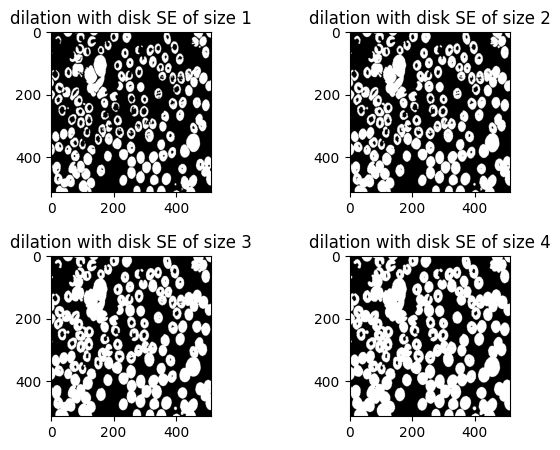

Not applicable! Requirements not met.


In [42]:
# Load a binary image as an example
im_cell_bin = skio.imread('images/cellbin.bmp')*255

# List of structuring element shapes and sizes to experiment with
structuring_elements = [
    ("diamond", 1),
    ("disk", 2),
    ("square", 3),
    ("line", 5)#automatically set to -45
]
morphological_op1("dilation", "", 3)#different shape, same size
plt.show()
morphological_op1("dilation", "disk", -1)#same shape, different size
plt.show()
morphological_op1("dilation", "disk", 3)#same shape, different size
plt.show()
